(<matplotlib.axes._subplots.AxesSubplot at 0x1698e05d6a0>,
 Text(0.5,1,'Penerapan Sobel Y'))

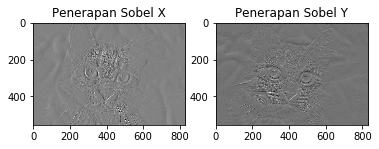

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
test_image = cv2.imread('kucing.jpg',0) #gambar dibaca grayscale
#cv2.Sobel(original_image,ddepth,xorder,yorder,kernelsize)
#tanda cv2.CV_64F adalah format grayscale 64 bit (true color)
#sedangkan cv2.CV_8U adalah format binary atau 8 bit (hitam putih)
sobelx = cv2.Sobel(test_image,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(test_image,cv2.CV_64F,0,1,ksize=3)
plt.figure()
plt.subplot(1,2,1),plt.imshow(sobelx,cmap='gray'),plt.title('Penerapan Sobel X')
plt.subplot(1,2,2),plt.imshow(sobely,cmap='gray'),plt.title('Penerapan Sobel Y')

In [ ]:
import cv2
import numpy

# Constants for finding range of skin color in YCrCb
min_YCrCb = numpy.array([0,133,77],numpy.uint8)
max_YCrCb = numpy.array([255,173,127],numpy.uint8)

# Create a window to display the camera feed
cv2.namedWindow('Camera Output')

# Get pointer to video frames from primary device
videoFrame = cv2.VideoCapture(0)

# Process the video frames
keyPressed = -1 # -1 indicates no key pressed

while(keyPressed < 0): # any key pressed has a value >= 0

    # Grab video frame, decode it and return next video frame
    readSucsess, sourceImage = videoFrame.read()

    # Convert image to YCrCb
    imageYCrCb = cv2.cvtColor(sourceImage,cv2.COLOR_BGR2YCR_CB)

    # Find region with skin tone in YCrCb image
    skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

    # Do contour detection on skin region
    contours, hierarchy = cv2.findContours(skinRegion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contour on the source image
    for i, c in enumerate(contours):
        area = cv2.contourArea(c)
        if area > 1000:
            cv2.drawContours(sourceImage, contours, i, (0, 255, 0), 3)

    # Display the source image
    cv2.imshow('Camera Output',sourceImage)

    # Check for user input to close program
    keyPressed = cv2.waitKey(1) # wait 1 milisecond in each iteration of while loop

# Close window and camera after exiting the while loop
cv2.destroyWindow('Camera Output')
videoFrame.release()

In [9]:
import numpy as np
from scipy.ndimage import filters

def apply_roberts(img):
  img = img.copy()

  # assemble the roberts kernel
  dx = np.array([[1, 0], [0, -1]])
  dy = np.array([[0, -1], [1, 0]])

  # apply the x and y kernels
  im_x = filters.convolve(img, dx, output=np.float64, mode='nearest')
  im_y = filters.convolve(img, dy, output=np.float64, mode='nearest')

  return im_x, im_y

In [12]:
import os
import cv2
import numpy as np

image = os.path.join(os.getcwd(), "C:Users/Lenovo/Pictures/TugasPCD/Kucing.JPG")
# image = os.path.join(os.getcwd(), "D:FOTO/dimas.jpg")
cv_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

roberts_x, roberts_y = apply_roberts(cv_image)

# copy the contents of the matrix before modifying it
roberts_x_text = roberts_x.copy()
roberts_y_text = roberts_y.copy()

# add labels to the images
cv2.putText(roberts_x_text, "Roberts - X", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)
cv2.putText(roberts_x_text, "Roberts - Y", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (190, 190, 190), 3)

# show the x and y image side by side
cv2.imshow('Roberts Operator Result', np.hstack([roberts_x_text, roberts_x_text]))

# converting back to uint8
abs_grad_x = cv2.convertScaleAbs(roberts_x.copy())
abs_grad_y = cv2.convertScaleAbs(roberts_y.copy())

# show the combined result
dst = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2.imshow('Roberts Operator Combined Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

SyntaxError: invalid syntax (<ipython-input-4-96e855586538>, line 6)